# ML Foundations hw3 - Coursera

In [120]:
from sympy import *
import numpy as np

## 1.

In [75]:
variance = 0.1
d = 8
E_in = 0.008
N = Symbol('N')
eq = Eq(variance**2 * (1 - (d+1) / N), E_in)

In [18]:
solve(eq, N)

[45.0000000000000]

In [96]:
(variance**2 * (1 - (d+1) / N)).subs(N, 100)

0.00910000000000000

## 6.

In [48]:
u, v = Symbol('u'), Symbol('v')
E = exp(u) + exp(2*v) + exp(u*v) + u**2 - 2*u*v + 2*(v**2) - 3*u - 2*v

In [110]:
print('gradient of u =', diff(E, u).subs([(u, 0), (v, 0)]))
print('gradient of v =', diff(E, v).subs([(u, 0), (v, 0)]))

gradient of u = -2
gradient of v = 0


## 7.

In [58]:
def gradient_descent(eq, iteration, eta, start):
    u_t, v_t = start
    for i in range(iteration):
        u_t_next = u_t - eta * diff(E, u).subs([(u, u_t), (v, v_t)])
        v_t_next = v_t - eta * diff(E, v).subs([(u, u_t), (v, v_t)])
        u_t = u_t_next
        v_t = v_t_next
    return (u_t, v_t)

In [59]:
start = (0, 0)
(u_t, v_t) = gradient_descent(E, 5, 0.01, start)

In [60]:
E.subs([(u, u_t), (v, v_t)])

2.82500035668326

## 8.

In [119]:
b_uu = diff(diff(E, u), u).subs([(u, 0), (v, 0)]) / factorial(2)
print('b_uu =', b_uu)

b_vv = diff(diff(E, v), v).subs([(u, 0), (v, 0)]) / factorial(2)
print('b_vv =', b_vv)

b_uv= diff(diff(E, u), v).subs([(u, 0), (v, 0)])
print('b_uv =', b_uv)

b_u = diff(E, u).subs([(u, 0), (v, 0)])
print('b_u =', b_u)

b_v = diff(E, v).subs([(u, 0), (v, 0)])
print('b_v =', b_v)

b = E.subs([(u, 0), (v, 0)])
print('b =', b)

b_uu = 3/2
b_vv = 4
b_uv = -1
b_u = -2
b_v = 0
b = 3


## 13.

In [347]:
def f(x1, x2):
    return np.sign(x1**2 + x2**2 - 0.6)

def gen_data(data_size):
    x0 = np.ones(data_size)
    x1 = np.random.uniform(low=-1, high=1, size=data_size)
    x2 = np.random.uniform(low=-1, high=1, size=data_size)
    X = np.array([x0, x1, x2]).T
    
    Y = []
    for x0, x1, x2 in X:
        y = f(x1, x2)
        Y.append(y)
    Y = np.array(Y)
    # Generate simulated noise by flipping the sign of the output
    flip_index = np.random.randint(0, data_size, int(data_size*0.1))
    Y[flip_index] *= -1
    
    Y = Y.reshape(-1, 1)
    
    return X, Y

def train(X, Y):
    pseudo_inv = np.linalg.pinv(X)
    w = np.dot(pseudo_inv, Y)
    return np.array(w)

def eval_error(X, Y, w):
    Y_hat = np.sign(np.dot(X, w))
    return len(Y_hat[Y_hat != Y]) / len(X)

In [332]:
error = 0
exp_time = 1000
for i in range(exp_time):
    X, Y = gen_data(1000)
    w = train(X, Y)
    error += eval_error(X, Y, w)
print('in-sample error =', error / exp_time)

in-sample error = 0.5052499999999998


## 14.

In [333]:
def transform(X):
    X_tran = []
    for x0, x1, x2 in X:
        X_tran.append([1, x0, x1, x1*x2, x1**2, x2**2])
    return np.array(X_tran)

In [334]:
X_tran = transform(X)
w = train(X_tran, Y)

In [339]:
options = [
    [-1, -1.5, 0.08, 0.13, 0.05, 0.05],
    [-1, -0.05, 0.08, 0.13, 15, 1.5],
    [-1, -0.05, 0.08, 0.13, 1.5, 1.5],
    [-1, -1.5, 0.08, 0.13, 0.05, 1.5],
    [-1, 0.05, 0.08, 0.13, 1.5, 15]
]
options = np.array(options)

In [352]:
print('in-sample error =', eval_error(X_tran, Y, w))
for index, o in enumerate(options):
    print('out-sample error', index, '=',eval_error(X_tran, Y, o.reshape(-1, 1)))

in-sample error = 0.114
out-sample error 0 = 0.518
out-sample error 1 = 0.353
out-sample error 2 = 0.154
out-sample error 3 = 0.518
out-sample error 4 = 0.354


In [359]:
error = 0
exp_time = 1000
for i in range(exp_time):
    X, Y = gen_data(1000)
    X_test, Y_test = gen_data(1000)
    X_tran = transform(X)
    X_test_tran = transform(X_test)
    w = train(X_tran, Y)
    error += eval_error(X_test_tran, Y_test, w)
print('out-sample error =', error / exp_time)

out-sample error = 0.12071399999999989


## 18.

In [366]:
train_data = np.loadtxt('./hw3_train.dat.txt')
test_data = np.loadtxt('./hw3_test.dat.txt')

In [383]:
X_train, Y_train = train_data[:, :-1], train_data[:, -1]
X_test, Y_test = test_data[:, :-1], test_data[:, -1]
x_dim = X_train.shape[1]

In [388]:
def sigmoid(s):
    return 1 / (1 + np.exp(-s))

def gradient(X, Y, w):
    grad = np.zeros(x_dim)
    for i in range(len(X)):
        grad += sigmoid(-Y[i]*np.dot(w, X[i])) * (-Y[i]*X[i])
    grad /= len(X)
    return grad

def logistic_regression(X, Y, eta, T):
    # Initalize w, shape = dim of x
    w = np.zeros(x_dim)
    for t in range(T):
        grad = gradient(X, Y, w)
        w -= eta * grad
    return w

In [424]:
w = logistic_regression(X_train, Y_train, eta=0.001, T=2000)

In [425]:
print('in-sample error =', eval_error(X_train, Y_train, w))
print('out-sample error =', eval_error(X_test, Y_test, w))

in-sample error = 0.464
out-sample error = 0.4716666666666667


## 19.

In [395]:
w = logistic_regression(X_train, Y_train, eta=0.01, T=2000)

In [396]:
print('in-sample error =', eval_error(X_train, Y_train, w))
print('out-sample error =', eval_error(X_test, Y_test, w))

in-sample error = 0.198
out-sample error = 0.22066666666666668


## 20.

In [398]:
def stochastic_gradient(X, Y, w, i):
    grad = sigmoid(-Y[i]*np.dot(w, X[i])) * (-Y[i]*X[i])
    return grad

def logistic_regression_sgd(X, Y, eta, T):
    # Initalize w, shape = dim of x
    w = np.zeros(x_dim)
    sample_index = 0
    for t in range(T):
        grad = stochastic_gradient(X, Y, w, sample_index)
        w -= eta * grad
        sample_index = (sample_index + 1) % len(X)
    return w

In [422]:
w = logistic_regression_sgd(X_train, Y_train, eta=0.001, T=2000)

In [423]:
print('in-sample error =', eval_error(X_train, Y_train, w))
print('out-sample error =', eval_error(X_test, Y_test, w))

in-sample error = 0.462
out-sample error = 0.4716666666666667


# ML Foundations hw3 - extension

In [426]:
import matplotlib.pyplot as plt

## 4.

In [452]:
T = 20000

In [453]:
# Gradient descent
E_in_gd = []
w = np.zeros(x_dim)
for t in range(T):
    grad = gradient(X_train, Y_train, w)
    w -= 0.01 * grad
    E_in_gd.append(eval_error(X_train, Y_train, w))

In [454]:
# Stochastic Gradient descent
E_in_sgd = []
w = np.zeros(x_dim)
sample_index = 0
for t in range(T):
    grad = stochastic_gradient(X_train, Y_train, w, sample_index)
    w -= 0.001 * grad
    sample_index = (sample_index + 1) % len(X)
    E_in_sgd.append(eval_error(X_train, Y_train, w))

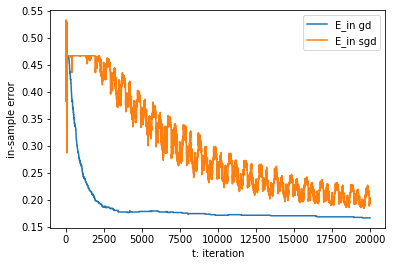

In [462]:
plt.plot(E_in_gd, label='E_in gd')
plt.plot(E_in_sgd, label='E_in sgd')
plt.xlabel('t: iteration')
plt.ylabel('in-sample error')
plt.legend()
plt.show()

## 5.

In [456]:
T = 20000

In [457]:
# Gradient descent
E_out_gd = []
w = np.zeros(x_dim)
for t in range(T):
    grad = gradient(X_train, Y_train, w)
    w -= 0.01 * grad
    E_out_gd.append(eval_error(X_test, Y_test, w))

In [458]:
# Stochastic gradient descent
E_out_sgd = []
w = np.zeros(x_dim)
sample_index = 0
for t in range(T):
    grad = stochastic_gradient(X_train, Y_train, w, sample_index)
    w -= 0.001 * grad
    sample_index = (sample_index + 1) % len(X_train)
    E_out_sgd.append(eval_error(X_test, Y_test, w))

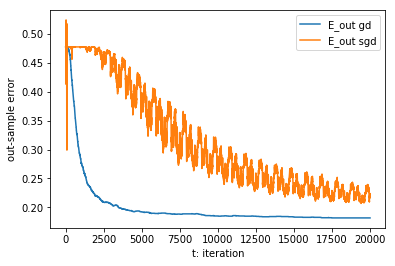

In [467]:
plt.plot(E_out_gd, label='E_out gd')
plt.plot(E_out_sgd, label='E_out sgd')
plt.xlabel('t: iteration')
plt.ylabel('out-sample error')
plt.legend()
plt.show()